# CAMPO MAGNETICO SU DISTANZA

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [170]:
def chi_quadro(funzione, popt, x, y, yerr):
    y_fit = funzione(x, *popt)  # Calcola i valori della funzione di fit
    chi2 = np.sum(((y - y_fit) / yerr) ** 2)  # Formula del chi quadro
    dof = len(x) - len(popt)  # Gradi di libertà
    return chi2 / dof  # Chi quadro ridotto

In [171]:
def retta(x, m, q):
    return m*x + q

In [172]:
def reciproco_quadrato(x, a, delta_x, q):
    quadrato_binomio = x*x + 2*x*delta_x + delta_x*delta_x
    return a/quadrato_binomio + q

In [173]:
def reciproco_cubo(x, a, delta_x, q):
    cubo_binomio = x*x*x + 3*x*x*delta_x + 3*x*delta_x*delta_x + delta_x*delta_x*delta_x
    return a/cubo_binomio + q

In [174]:
def reciproco_quartica(x, a, delta_x, q):
    quarta_binomio = (x+delta_x)*(x+delta_x)*(x+delta_x)*(x+delta_x)
    return a/quarta_binomio + q

In [175]:
def reciproco_nonica(x, a, delta_x, q):
    quarta_binomio = (x+delta_x)*(x+delta_x)*(x+delta_x)*(x+delta_x)
    nonica = quarta_binomio * (x+delta_x)*(x+delta_x)*(x+delta_x)*(x+delta_x)*(x+delta_x)
    return a/nonica + q

In [176]:
def reciproco_dodeca(x, a, delta_x, q):
    quarta_binomio = (x+delta_x)*(x+delta_x)*(x+delta_x)*(x+delta_x)
    dodeca = quarta_binomio * quarta_binomio * quarta_binomio
    return a/dodeca + q

In [177]:
def esp_dec(x, a, b):
    return b*(np.exp(-a/x) - 1)

In [178]:
MU_ZERO = 4*np.pi*1e-04 # -4 perché in mm

In [179]:
def disco_magnetico (x, M, h, R):
    termine1 = h / np.sqrt( R*R + (x-h/2)*(x-h/2) )
    termine2 = h / np.sqrt( R*R + (x+h/2)*(x+h/2) )
    return MU_ZERO*M/2 * (termine1 - termine2)

## Magnete piccolo

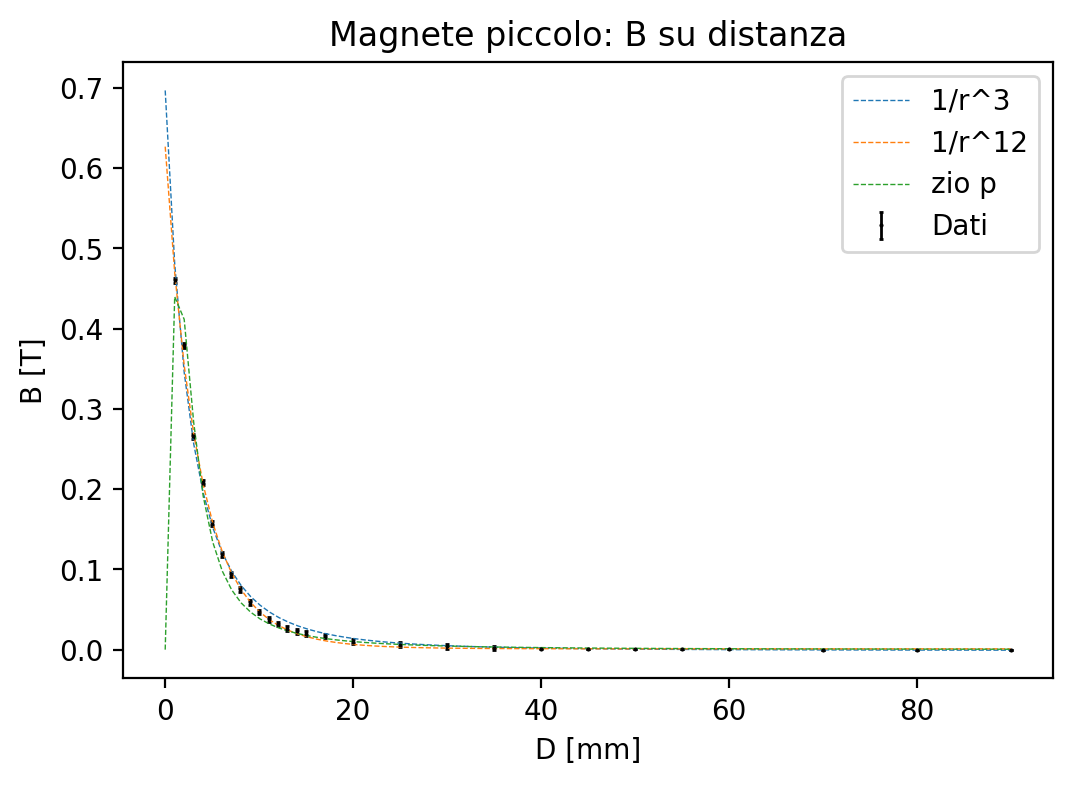

In [180]:
# Legge il file ignorando la prima riga (intestazione)
dati1 = np.loadtxt("data/magnete_piccolo_su_d.csv", skiprows=1)

d1 = dati1[:,1]   # ascissa
B1 = dati1[:,0]   # ordinata
err_B1 = dati1[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d1 = d1[1:]   
B1 = B1[1:]   
err_B1 = err_B1[1:]*3

# FIT #
low = (-np.inf, -np.inf, -0.001)
upp = (np.inf, np.inf, 0.001)
low_disc_piccolo = (0, 1, 1)
upp_disc_piccolo = (np.inf, 20, 20)
bounds_piccolo = (low_disc_piccolo,upp_disc_piccolo)
p0_piccolo=(1e05, 5, 5)
popt1, pcov1 = curve_fit(reciproco_quadrato, d1, B1, bounds=(low,upp))
popt1_1, pcov1_1 = curve_fit(reciproco_cubo, d1, B1, bounds=(low,upp))
popt1_2, pcov1_2 = curve_fit(reciproco_quartica, d1, B1, bounds=(low,upp))
popt1_4, pcov1_4 = curve_fit(reciproco_nonica, d1, B1, bounds=(low,upp))
popt1_5, pcov1_5 = curve_fit(reciproco_dodeca, d1, B1, bounds=(low,upp))
popt1_6, pcov1_6 = curve_fit(disco_magnetico, d1, B1, p0=p0_piccolo, bounds=bounds_piccolo, maxfev=10000)

plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    d1, B1, yerr=err_B1,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
# QUADRATO
x_fit1 = np.linspace(0, 90, 90)
y_fit1 = reciproco_quadrato(x_fit1, *popt1)
etichetta1 = f"a={popt1[0]:.2f}\nΔx={popt1[1]:.2f}\nΔy={popt1[2]:.2f}"
#plt.plot(x_fit1, y_fit1, linestyle='--', label='1/r^2', markersize=3, linewidth=0.5)
# CUBO
y_fit1_1 = reciproco_cubo(x_fit1, *popt1_1)
etichetta1_1 = f"a={popt1_1[0]:.2f}\nΔx={popt1_1[1]:.2f}\nΔy={popt1_1[2]:.2f}"
plt.plot(x_fit1, y_fit1_1, linestyle='--', label='1/r^3', markersize=3, linewidth=0.5)
# QUARTICA
'''y_fit1_2 = reciproco_quartica(x_fit1, *popt1_2)
etichetta1_2 = f"a={popt1_2[0]:.2f}\nΔx={popt1_2[1]:.2f}\nΔy={popt1_2[2]:.2f}"
plt.plot(x_fit1, y_fit1_2, linestyle='--', label='1/r^4', markersize=3, linewidth=0.5)'''
# NONICA #
y_fit1_4 = reciproco_nonica(x_fit1, *popt1_4)
etichetta1_4 = f"a={popt1_4[0]:.2f}\nΔx={popt1_4[1]:.2f}\nΔy={popt1_4[2]:.2f}"
#plt.plot(x_fit1, y_fit1_4, linestyle='--', label='1/r^9', markersize=3, linewidth=0.5)
# DODECA #
y_fit1_5 = reciproco_dodeca(x_fit1, *popt1_5)
etichetta1_5 = f"a={popt1_5[0]:.2f}\nΔx={popt1_5[1]:.2f}\nΔy={popt1_5[2]:.2f}"
plt.plot(x_fit1, y_fit1_5, linestyle='--', label='1/r^12', markersize=3, linewidth=0.5)
# DISCO MAGNETICO #
y_fit1_6 = disco_magnetico(x_fit1, *popt1_6)
etichetta1_6 = f"a={popt1_6[0]:.2f}\nΔx={popt1_6[1]:.2f}\nΔy={popt1_6[2]:.2f}"
plt.plot(x_fit1, y_fit1_6, linestyle='--', label='zio p', markersize=3, linewidth=0.5)

plt.xlabel("D [mm]")
#plt.yscale('log')
plt.ylabel("B [T]") # [T]
plt.title("Magnete piccolo: B su distanza")
plt.legend()
plt.show()

In [181]:
chi2_2 = chi_quadro(reciproco_quadrato, popt1, d1, B1, err_B1)
chi2_1 = chi_quadro(reciproco_cubo, popt1_1, d1, B1, err_B1)
chi2_2_2 = chi_quadro(reciproco_quartica, popt1_2, d1, B1, err_B1)
chi2_4 = chi_quadro(reciproco_nonica, popt1_4, d1, B1, err_B1)
chi2_5 = chi_quadro(reciproco_dodeca, popt1_5, d1, B1, err_B1)
chi2_6 = chi_quadro(disco_magnetico, popt1_6, d1, B1, err_B1)

print(f"Chi quadro ridotto per 1/r^2: {chi2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^3: {chi2_1:.3f}")
print(f"Chi quadro ridotto per 1/r^4: {chi2_2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^9: {chi2_4:.3f}")
print(f"Chi quadro ridotto per 1/r^12: {chi2_5:.3f}")
print(f"Chi quadro ridotto per ZIO PERA: {chi2_6:.3f}")

Chi quadro ridotto per 1/r^2: 1219.586
Chi quadro ridotto per 1/r^3: 56.993
Chi quadro ridotto per 1/r^4: 221.933
Chi quadro ridotto per 1/r^9: 186.535
Chi quadro ridotto per 1/r^12: 179.012
Chi quadro ridotto per ZIO PERA: 242.061


In [182]:
print('M = ', popt1_6[0])
print('h = ', popt1_6[1])
print('R = ', popt1_6[2])

M =  6498.819946244207
h =  1.0000000000000009
R =  1.8091861343625524


## Magnete grande

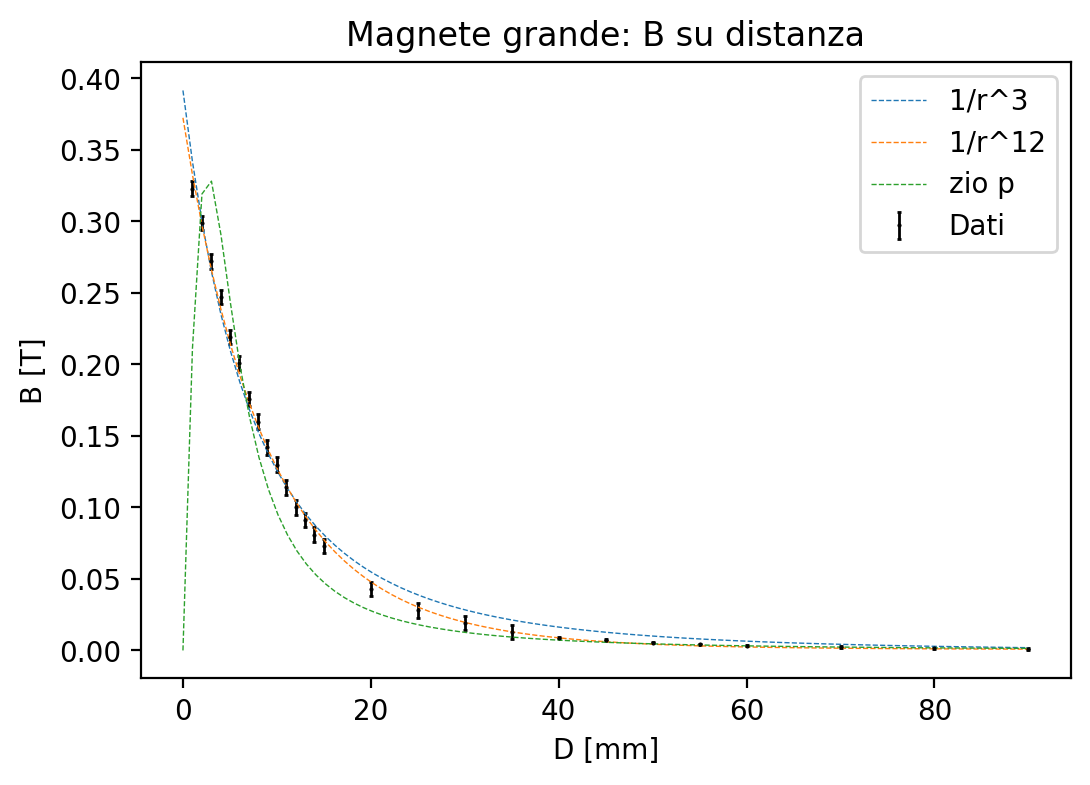

In [183]:
dati2 = np.loadtxt("data/magnete_grande_su_d.csv", skiprows=1)

d2 = dati2[:,1]   # ascissa
B2 = dati2[:,0]   # ordinata
err_B2 = dati2[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d2 = d2[1:]   
B2 = B2[1:]   
err_B2 = err_B2[1:]*5

low_disc_grande = (0, 3, 3)
upp_disc_grande = (np.inf, 50, 50)
bounds_grande = (low_disc_grande,upp_disc_grande)
p0_grande=(1e+04, 10, 10)

# FIT #
popt2, pcov2 = curve_fit(reciproco_quadrato, d2, B2, bounds=(low,upp))
popt2_1, pcov2_1 = curve_fit(reciproco_cubo, d2, B2, bounds=(low,upp))
popt2_2, pcov2_2 = curve_fit(reciproco_quartica, d2, B2, bounds=(low,upp))
popt2_4, pcov2_4 = curve_fit(reciproco_nonica, d2, B2, bounds=(low,upp))
popt2_5, pcov2_5 = curve_fit(reciproco_dodeca, d2, B2, bounds=(low,upp))
popt2_6, pcov2_6 = curve_fit(disco_magnetico, d2, B2, p0=p0_grande, bounds=(low_disc,upp_disc), maxfev=10000)

plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    d2, B2, yerr=err_B2,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
# QUADRATO
x_fit2 = np.linspace(0, 90, 90)
y_fit2 = reciproco_quadrato(x_fit2, *popt2)
etichetta2 = f"a={popt2[0]:.2f}\nΔx={popt2[1]:.2f}\nΔy={popt2[2]:.2f}"
#plt.plot(x_fit2, y_fit2, linestyle='--', label='1/r^2', markersize=3, linewidth=0.5)
# CUBO
y_fit2_1 = reciproco_cubo(x_fit2, *popt2_1)
etichetta2_1 = f"a={popt2_1[0]:.2f}\nΔx={popt2_1[1]:.2f}\nΔy={popt2_1[2]:.2f}"
plt.plot(x_fit2, y_fit2_1, linestyle='--', label='1/r^3', markersize=3, linewidth=0.5)
# QUARTICA
'''y_fit2_2 = reciproco_quartica(x_fit2, *popt2_2)
etichetta2_2 = f"a={popt2_2[0]:.2f}\nΔx={popt2_2[1]:.2f}\nΔy={popt2_2[2]:.2f}"
plt.plot(x_fit2, y_fit2_2, linestyle='--', label='1/r^4', markersize=3, linewidth=0.5)'''
# NONICA #
y_fit2_4 = reciproco_nonica(x_fit2, *popt2_4)
etichetta2_4 = f"a={popt2_4[0]:.2f}\nΔx={popt2_4[1]:.2f}\nΔy={popt2_4[2]:.2f}"
#plt.plot(x_fit2, y_fit2_4, linestyle='--', label='1/r^9', markersize=3, linewidth=0.5)
# DODICA #
y_fit2_5 = reciproco_dodeca(x_fit2, *popt2_5)
etichetta2_5 = f"a={popt2_5[0]:.2f}\nΔx={popt2_5[1]:.2f}\nΔy={popt2_5[2]:.2f}"
plt.plot(x_fit2, y_fit2_5, linestyle='--', label='1/r^12', markersize=3, linewidth=0.5)
# DISCO MAGNETICO #
y_fit2_6 = disco_magnetico(x_fit2, *popt2_6)
etichetta2_6 = f"a={popt2_6[0]:.2f}\nΔx={popt2_6[1]:.2f}\nΔy={popt2_6[2]:.2f}"
plt.plot(x_fit2, y_fit2_6, linestyle='--', label='zio p', markersize=3, linewidth=0.5)

plt.xlabel("D [mm]")
#plt.yscale('log')
plt.ylabel("B [T]") # [T]
plt.title("Magnete grande: B su distanza")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

In [184]:
chi2_2 = chi_quadro(reciproco_quadrato, popt2, d2, B2, err_B2)
chi2_1 = chi_quadro(reciproco_cubo, popt2_1, d2, B2, err_B2)
chi2_2_2 = chi_quadro(reciproco_quartica, popt2_2, d2, B2, err_B2)
chi2_4 = chi_quadro(reciproco_nonica, popt2_4, d2, B2, err_B2)
chi2_5 = chi_quadro(reciproco_dodeca, popt2_5, d2, B2, err_B2)
chi2_6 = chi_quadro(disco_magnetico, popt2_6, d2, B2, err_B2)

print(f"Chi quadro ridotto per 1/r^2: {chi2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^3: {chi2_1:.3f}")
print(f"Chi quadro ridotto per 1/r^4: {chi2_2_2:.3f}")
print(f"Chi quadro ridotto per 1/r^9: {chi2_4:.3f}")
print(f"Chi quadro ridotto per 1/r^12: {chi2_5:.3f}")
print(f"Chi quadro ridotto per ZIO PERA: {chi2_6:.3f}")

Chi quadro ridotto per 1/r^2: 104.524
Chi quadro ridotto per 1/r^3: 24.941
Chi quadro ridotto per 1/r^4: 7.295
Chi quadro ridotto per 1/r^9: 2.009
Chi quadro ridotto per 1/r^12: 1.500
Chi quadro ridotto per ZIO PERA: 44.868


In [185]:
print('M = ', popt2_6[0])
print('h = ', popt2_6[1])
print('R = ', popt2_6[2])

M =  18546.3910045167
h =  1.0000000000000002
R =  3.6546776830264798


## SOVRAPPOSTI

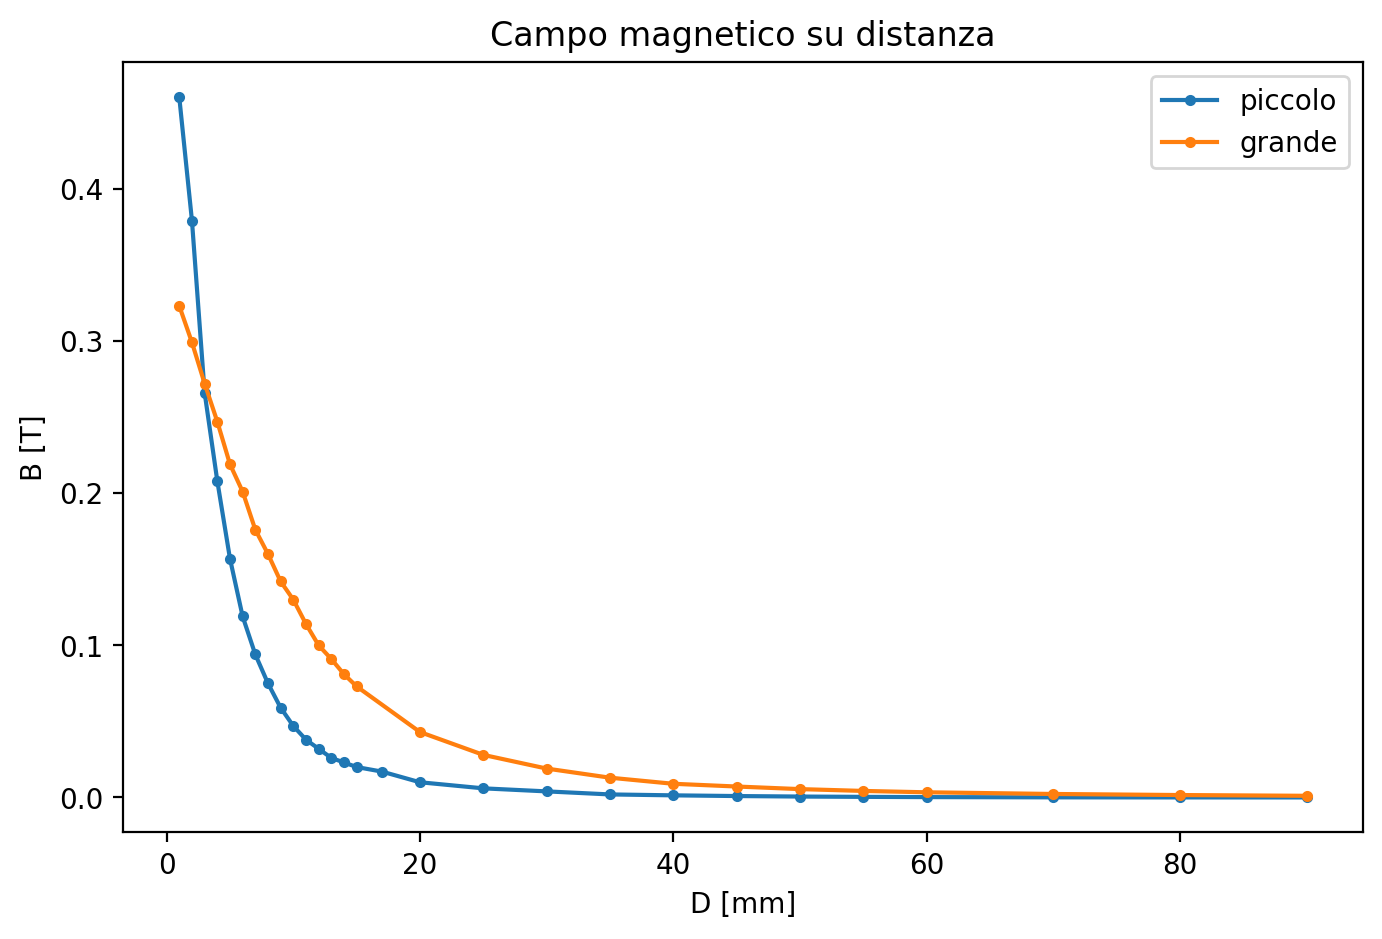

In [186]:
plt.figure(figsize=(8, 5), dpi=200)
plt.plot(d1, B1, marker='o', linestyle='-', label='piccolo', markersize=3)
plt.plot(d2, B2, marker='o', linestyle='-', label='grande', markersize=3)
plt.xlabel("D [mm]")
#plt.yscale('log')
plt.ylabel("B [T]")
plt.title("Campo magnetico su distanza")
plt.legend()
plt.show()